<h1>Regression</h1>
Regression is a nothing but predict a continues value like 10,89,49,120...n

Regression applications
  -price estimation
  -employ salary prediction
  -house price prediction

types of Regression

1.simple linear regression

2.multipal linear regression



<h2>Simple linear regression</h2>
simple linear regression can perform based on one independent variable(x) and one dependent variable(y).

evalution formula:
y=mx+c
y-dependent variable,
m-coefficent,
x-independent variable
c-intercept

coefficent and intercept is important to give a best fit line
 


In [3]:
#import packages

In [4]:
import pandas as pd
import numpy as np

In [5]:
import scipy.optimize as opt
import pylab as pl
import matplotlib.pyplot as plt
%matplotlib inline

In [6]:
#import/upload  data set 
#its importatnt because of without upload data set can not predict/modeling
#data set donwload by kaggle.com
df=pd.read_csv("FuelConsumptionCo2.csv")

In [7]:
df.head(4)

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255


In [8]:
df.describe()

,MODELYEAR,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
count,1067.0,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000
mean,2014.0,3.346298,5.794752,13.296532,9.474602,11.580881,26.441425,256.228679
std,0.0,1.415895,1.797447,4.101253,2.794510,3.485595,7.468702,63.372304
min,2014.0,1.000000,3.000000,4.600000,4.900000,4.700000,11.000000,108.000000
25%,2014.0,2.000000,4.000000,10.250000,7.500000,9.000000,21.000000,207.000000
50%,2014.0,3.400000,6.000000,12.600000,8.800000,10.900000,26.000000,251.000000
75%,2014.0,4.300000,8.000000,15.550000,10.850000,13.350000,31.000000,294.000000
max,2014.0,8.400000,12.000000,30.200000,20.500000,25.800000,60.000000,488.000000


In [9]:
df.tail(4)

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
1063,2014,VOLVO,XC60 AWD,SUV - SMALL,3.2,6,AS6,X,13.2,9.5,11.5,25,264
1064,2014,VOLVO,XC70 AWD,SUV - SMALL,3.0,6,AS6,X,13.4,9.8,11.8,24,271
1065,2014,VOLVO,XC70 AWD,SUV - SMALL,3.2,6,AS6,X,12.9,9.3,11.3,25,260
1066,2014,VOLVO,XC90 AWD,SUV - STANDARD,3.2,6,AS6,X,14.9,10.2,12.8,22,294


In [10]:
df.info()
#showing the information about your dataset
#show null value, total number of rows and columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1067 entries, 0 to 1066
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   MODELYEAR                 1067 non-null   int64  
 1   MAKE                      1067 non-null   object 
 2   MODEL                     1067 non-null   object 
 3   VEHICLECLASS              1067 non-null   object 
 4   ENGINESIZE                1067 non-null   float64
 5   CYLINDERS                 1067 non-null   int64  
 6   TRANSMISSION              1067 non-null   object 
 7   FUELTYPE                  1067 non-null   object 
 8   FUELCONSUMPTION_CITY      1067 non-null   float64
 9   FUELCONSUMPTION_HWY       1067 non-null   float64
 10  FUELCONSUMPTION_COMB      1067 non-null   float64
 11  FUELCONSUMPTION_COMB_MPG  1067 non-null   int64  
 12  CO2EMISSIONS              1067 non-null   int64  
dtypes: float64(4), int64(4), object(5)
memory usage: 108.5+ KB


In [11]:
df.isnull().sum()
#show the null values in your dataset

MODELYEAR                   0
MAKE                        0
MODEL                       0
VEHICLECLASS                0
ENGINESIZE                  0
CYLINDERS                   0
TRANSMISSION                0
FUELTYPE                    0
FUELCONSUMPTION_CITY        0
FUELCONSUMPTION_HWY         0
FUELCONSUMPTION_COMB        0
FUELCONSUMPTION_COMB_MPG    0
CO2EMISSIONS                0
dtype: int64

In [12]:
# you can create data set which columns is you required 
simple=df[['ENGINESIZE','CO2EMISSIONS']]

In [13]:
simple

,ENGINESIZE,CO2EMISSIONS
0,2.0,196
1,2.4,221
2,1.5,136
3,3.5,255
4,3.5,244
...,...,...
1062,3.0,271
1063,3.2,264
1064,3.0,271
1065,3.2,260


In [14]:
#sci-kit learn function
"""
from sklearn import preprocessing
x=preprocessing.StandardScaler().fit(x).transform(x)

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=4)
# select or divide traning and testing data set traing as 80% and testing as 20%
#random_state select a data set as random

from sklearn import svm
clf=svm.SVC(gamma=0.02,c=2)

clf.fit(x_train,y_train)
#fit the line

clf.predict(x_test)
#predict the values


from sklearn.metrics import confucion_matrix
print(confusion_matrix(y_test,yhat,labels=[1,0]))
"""

'\nfrom sklearn import preprocessing\nx=preprocessing.StandardScaler().fit(x).transform(x)\n\nfrom sklearn.model_selection import train_test_split\nx_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=4)\n# select or divide traning and testing data set traing as 80% and testing as 20%\n#random_state select a data set as random\n\nfrom sklearn import svm\nclf=svm.SVC(gamma=0.02,c=2)\n\nclf.fit(x_train,y_train)\n#fit the line\n\nclf.predict(x_test)\n#predict the values\n\n\nfrom sklearn.metrics import confucion_matrix\nprint(confusion_matrix(y_test,yhat,labels=[1,0]))\n'

In [15]:

simple.head(4)



,ENGINESIZE,CO2EMISSIONS
0,2.0,196
1,2.4,221
2,1.5,136
3,3.5,255


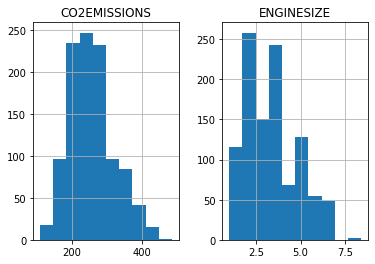

In [16]:
# check a histograph data
simple.hist()
plt.show()

In [17]:
#traning and testing a data set 
#train dataset are used devlope a model
#test dataset are used validation your model
#train and test split data to get best accuracy of your model

msk=np.random.rand(len(df))<0.8 
train=simple[msk] #traing a  data a set as 80%

test=simple[~msk]#testing a data a set as 20%

print("train",train.shape)
print("test",test.shape)

train (857, 2)
test (210, 2)


In [18]:
from sklearn import linear_model
regr=linear_model.LinearRegression()

In [19]:
regr


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [20]:
#np.asanyarray is used for when data type is difference such as int float then used this see the df.info()- to check 
train_x=np.asanyarray(train[['ENGINESIZE']])# independent variable
train_y=np.asanyarray(train[['CO2EMISSIONS']])#dependent variable

regr.fit(train_x,train_y)#fit question and answer
print("intercept" ,regr.intercept_)
print("coeficient" ,regr.coef_)

intercept [125.95657174]
coeficient [[38.84741343]]


In [21]:
#predict

from sklearn.metrics import r2_score

test_x=np.asanyarray(test[['ENGINESIZE']])
test_y=np.asanyarray(test[['CO2EMISSIONS']])

yhat=regr.predict(test_x)

yhat[0:5]#check only 5 predicted value

print("mean absolute error %.2f" % np.mean(np.absolute(test_y-yhat)))
print("residual some of error %.2f " % np.mean((test_y-yhat)**2) )
print("r2_score %.2f"% r2_score(yhat,test_y))


mean absolute error 24.91
residual some of error 1090.45 
r2_score 0.61


<h2>multi linear regresion</2>

multi linear regression can perform based on 2 or more than 2 independent variable(x1,x2) and one dependent variable(y).

evalution formula:
y=mx+c
y-dependent variable,
m-coefficent,
x-independent variable
c-intercept

(if used only 2 independet variable(x1,x2) then)
2 or moere than 2 coefficent and 1 intercept is important to give a best fit line

multi linear regression is give best accccuracy than simple linear regression because used more than 2 independent variable(x1,x2)used

In [22]:
multiple=df[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB','CO2EMISSIONS']]
multiple.head(3)

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_COMB,CO2EMISSIONS
0,2.0,4,8.5,196
1,2.4,4,9.6,221
2,1.5,4,5.9,136


In [23]:
multiple.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1067 entries, 0 to 1066
Data columns (total 4 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   ENGINESIZE            1067 non-null   float64
 1   CYLINDERS             1067 non-null   int64  
 2   FUELCONSUMPTION_COMB  1067 non-null   float64
 3   CO2EMISSIONS          1067 non-null   int64  
dtypes: float64(2), int64(2)
memory usage: 33.5 KB


In [24]:
mks1=np.random.rand(len(multiple))<0.8
train=multiple[mks1]
test=multiple[~mks1]

print("train",train.shape)
print("test",test.shape)

train (854, 4)
test (213, 4)


In [25]:
#modeling 
from sklearn import linear_model
regr=linear_model.LinearRegression()
print(regr)
x=np.asanyarray(train[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB']])
y=np.asanyarray(train[['CO2EMISSIONS']])
regr.fit(x,y)
print("coefecent and intercept",regr.coef_,regr.intercept_)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)
coefecent and intercept [[9.78671472 8.11065656 9.50568646]] [65.92545063]


In [26]:
# predict a model 

from sklearn.metrics import r2_score

yhat1=regr.predict(test[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB']])
test_y=np.asanyarray(test[['CO2EMISSIONS']])

print("mean absolute error %.2f" %np.mean(np.absolute(yhat1-test_y)))
print("mean variance %.2f"% regr.score(x,y))
print("r2_score %.2f" % r2_score(yhat1,test_y))

mean absolute error 16.21
mean variance 0.86
r2_score 0.85


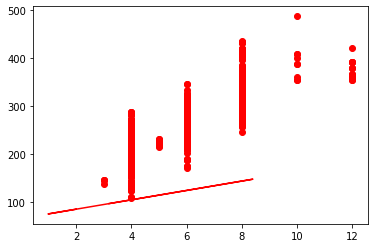

In [30]:
#best fit line

plt.scatter(multiple.CYLINDERS,multiple.CO2EMISSIONS,color='red')

plt.plot(train_x,regr.coef_[0][0]*train_x +regr.intercept_[0],'-r')#y=mx+c
plt.show()
#scatter plot shwowing graph in cylinders variable is not good for best fit line